In [15]:
import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv("E:/Spam.csv")

In [26]:
data['Length'] = data['Message'].apply(len)
data.head()

,Category,Message,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [4]:
data.duplicated().sum()

415

In [5]:
len(data)

5572

In [6]:
data=data.drop_duplicates()

In [7]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [8]:
data.groupby("Category").count()

,Message
Category,
ham,4516
spam,641


In [9]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()
data["Category"]=le.fit_transform(data["Category"])

In [11]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
len(data)

5157

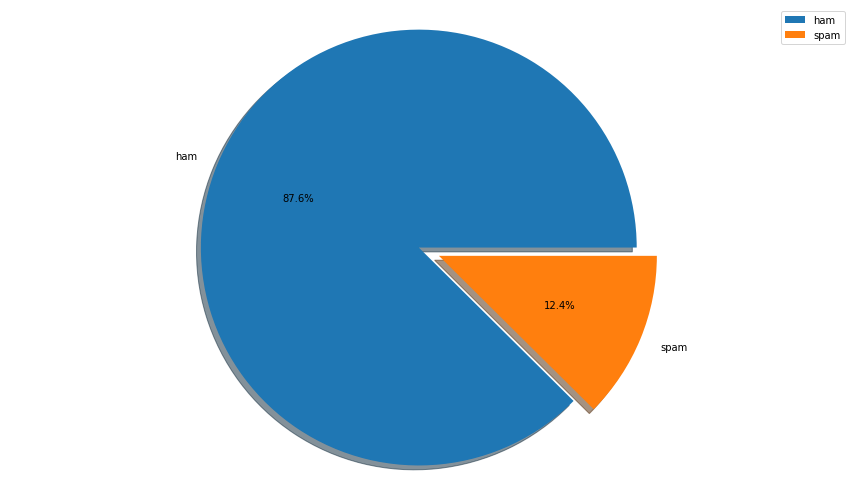

In [22]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data['Category'].value_counts(), explode=explode,labels=['ham','spam'], autopct='%1.1f%%',
        shadow=True)
plt.tight_layout()
plt.legend()
plt.show()

(array([4516.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         641.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

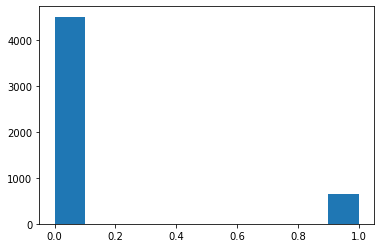

In [20]:
plt.hist(data["Category"])

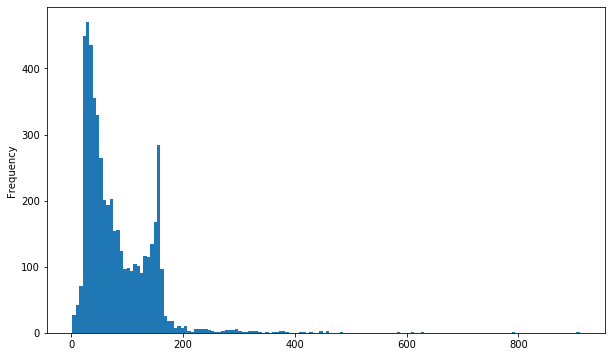

In [27]:
plt.figure(figsize=(10,6))
data['Length'].plot.hist(bins = 150)

In [30]:
corpus=[]
for i in range(0,5157):
    c=re.sub('[^a-z,A-Z]',' ',data["Message"][0])
    c=c.lower()
    c=c.split()
    ps=PorterStemmer()
    c=  [ps.stem(w) for w in c if not w in stopwords.words("english")]
    c=' '.join(c)
    corpus.append(c)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=4500)

In [32]:
X=cv.fit_transform(corpus).toarray()

In [33]:
y=data["Category"]

In [34]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
svc=SVC()

In [37]:
svc.fit(X_train,y_train)

C:\Users\tharu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
pred=svc.predict(X_test)

In [39]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=svc,X=X_train,y=y_train,cv=10)

C:\Users\tharu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\tharu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\tharu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\tharu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

In [40]:
accuracies
accuracies.mean()
stats.median(accuracies)

0.8782608695652174

In [41]:
accuracies

array([0.87608069, 0.87608069, 0.87861272, 0.87826087, 0.87826087,
       0.87826087, 0.87826087, 0.87826087, 0.87826087, 0.87826087])

Text(0.5, 257.44, 'Predicted label')

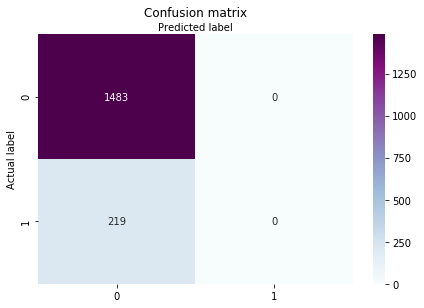

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')